In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

In [2]:
weather = pd.read_csv(r'/Users/Juanito/Downloads/PhiladelphiaAirportWeather1992-2022.csv', index_col='DATE')

In [3]:
weather

,STATION,NAME,ACMH,ACSH,AWND,FMTM,PGTM,PRCP,PSUN,SNOW,...,WT13,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22,WV03
DATE,,,,,,,,,,,,,,,,,,,,,
1/1/92,USW00013739,"PHILADELPHIA INTERNATIONAL AIRPORT, PA US",60.0,70.0,4.25,1850.0,1727.0,0.00,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1/2/92,USW00013739,"PHILADELPHIA INTERNATIONAL AIRPORT, PA US",80.0,50.0,8.50,2250.0,2338.0,0.00,NaN,0.0,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
1/3/92,USW00013739,"PHILADELPHIA INTERNATIONAL AIRPORT, PA US",100.0,90.0,17.90,1450.0,2338.0,0.00,NaN,0.0,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
1/4/92,USW00013739,"PHILADELPHIA INTERNATIONAL AIRPORT, PA US",100.0,100.0,22.82,736.0,703.0,0.16,NaN,0.0,...,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
1/5/92,USW00013739,"PHILADELPHIA INTERNATIONAL AIRPORT, PA US",80.0,80.0,14.32,1350.0,1353.0,0.00,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2/5/22,USW00013739,"PHILADELPHIA INTERNATIONAL AIRPORT, PA US",NaN,NaN,15.21,NaN,NaN,0.00,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2/6/22,USW00013739,"PHILADELPHIA INTERNATIONAL AIRPORT, PA US",NaN,NaN,3.80,NaN,NaN,0.00,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2/7/22,USW00013739,"PHILADELPHIA INTERNATIONAL AIRPORT, PA US",NaN,NaN,6.04,NaN,NaN,0.04,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Cleaning Data

In [4]:
weather.isnull().sum().sort_values()/len(weather)

STATION    0.000000
NAME       0.000000
TMIN       0.000546
TMAX       0.000546
PRCP       0.000546
AWND       0.000727
SNOW       0.000818
SNWD       0.000909
WDF2       0.130569
WSF2       0.130569
WSF5       0.131388
WDF5       0.131478
FMTM       0.342062
PGTM       0.416803
WESD       0.470813
TAVG       0.481815
TSUN       0.531460
WT01       0.603110
WT16       0.700218
WT13       0.783142
WT08       0.839243
ACSH       0.869976
ACMH       0.869976
WDFG       0.870067
WSFG       0.870067
WT03       0.923622
WSF1       0.950173
WDF1       0.950173
WT18       0.951264
WT14       0.951628
WT02       0.967449
WT05       0.967721
WT04       0.984543
PSUN       0.989816
WT06       0.990726
WT07       0.992817
WT17       0.994726
WT09       0.996545
WT22       0.996636
WT11       0.996999
WT19       0.997363
WT21       0.997454
WT15       0.998454
WV03       0.999909
dtype: float64

In [5]:
core_weather = weather[["PRCP", "SNOW", "SNWD", "TMIN", "TMAX"]].copy()

In [6]:
core_weather.isnull().sum().sort_values()

PRCP     6
TMIN     6
TMAX     6
SNOW     9
SNWD    10
dtype: int64

In [7]:
core_weather.columns = ["precip", "snow", "snow_depth", "temp_min", "temp_max"]

In [8]:
core_weather['precip'].value_counts(normalize=True)

0.00    0.667940
0.01    0.033206
0.02    0.020287
0.03    0.016830
0.04    0.015466
          ...   
2.39    0.000091
1.76    0.000091
4.68    0.000091
6.63    0.000091
3.45    0.000091
Name: precip, Length: 247, dtype: float64

In [9]:
core_weather['snow'].value_counts(normalize=True)

0.0     0.966512
0.1     0.004914
0.2     0.003276
0.3     0.002275
0.9     0.001547
          ...   
9.0     0.000091
7.6     0.000091
11.7    0.000091
4.6     0.000091
4.9     0.000091
Name: snow, Length: 75, dtype: float64

In [10]:
core_weather['snow_depth'].value_counts(normalize=True).head()

0.0    0.956316
1.0    0.010375
2.0    0.007463
3.0    0.003913
4.0    0.003185
Name: snow_depth, dtype: float64

In [11]:
# Fill all missing values for precip, snow, and snow depth with 0 since this is 
# the value that occurs the most
core_weather[['precip', 'snow', 'snow_depth']] = core_weather[['precip', 'snow', 'snow_depth']].fillna(0)

In [12]:
core_weather.isnull().sum().sort_values()

precip        0
snow          0
snow_depth    0
temp_min      6
temp_max      6
dtype: int64

In [13]:
# Fill all missing values for temp_min and temp_max with the previous value
core_weather = core_weather.fillna(method='ffill')

# ffill = forward fill 

In [14]:
core_weather.isnull().sum().sort_values()

precip        0
snow          0
snow_depth    0
temp_min      0
temp_max      0
dtype: int64

In [15]:
core_weather.dtypes

precip        float64
snow          float64
snow_depth    float64
temp_min      float64
temp_max      float64
dtype: object

In [16]:
core_weather.index

Index(['1/1/92', '1/2/92', '1/3/92', '1/4/92', '1/5/92', '1/6/92', '1/7/92',
       '1/8/92', '1/9/92', '1/10/92',
       ...
       '1/31/22', '2/1/22', '2/2/22', '2/3/22', '2/4/22', '2/5/22', '2/6/22',
       '2/7/22', '2/8/22', '2/9/22'],
      dtype='object', name='DATE', length=10998)

In [17]:
core_weather.index = pd.to_datetime(core_weather.index)
core_weather.index

DatetimeIndex(['1992-01-01', '1992-01-02', '1992-01-03', '1992-01-04',
               '1992-01-05', '1992-01-06', '1992-01-07', '1992-01-08',
               '1992-01-09', '1992-01-10',
               ...
               '2022-01-31', '2022-02-01', '2022-02-02', '2022-02-03',
               '2022-02-04', '2022-02-05', '2022-02-06', '2022-02-07',
               '2022-02-08', '2022-02-09'],
              dtype='datetime64[ns]', name='DATE', length=10998, freq=None)

In [18]:
core_weather.index.year

Int64Index([1992, 1992, 1992, 1992, 1992, 1992, 1992, 1992, 1992, 1992,
            ...
            2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022],
           dtype='int64', name='DATE', length=10998)

The power of making the index a date then converting it to a datetime object^^^^

In [19]:
core_weather.apply(lambda x: (x==9999).sum())

precip        0
snow          0
snow_depth    0
temp_min      0
temp_max      0
dtype: int64

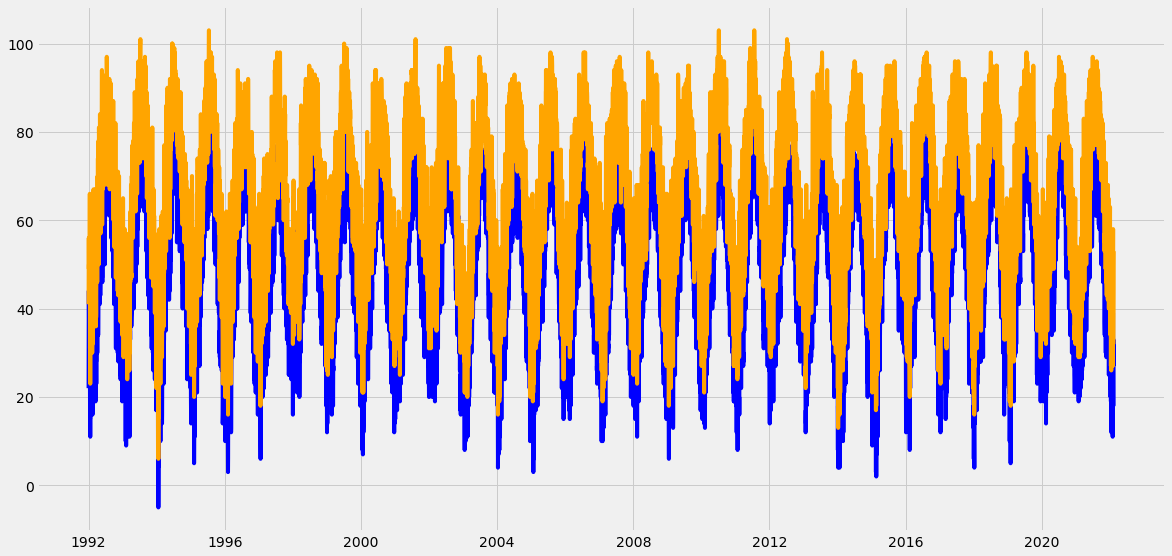

In [20]:
plt.figure(figsize=(18,9))
plt.plot(core_weather.index, core_weather['temp_min'], color='blue', label='temp_min')
plt.plot(core_weather.index, core_weather['temp_max'], color='orange', label='temp_max')
plt.legend
plt.show()

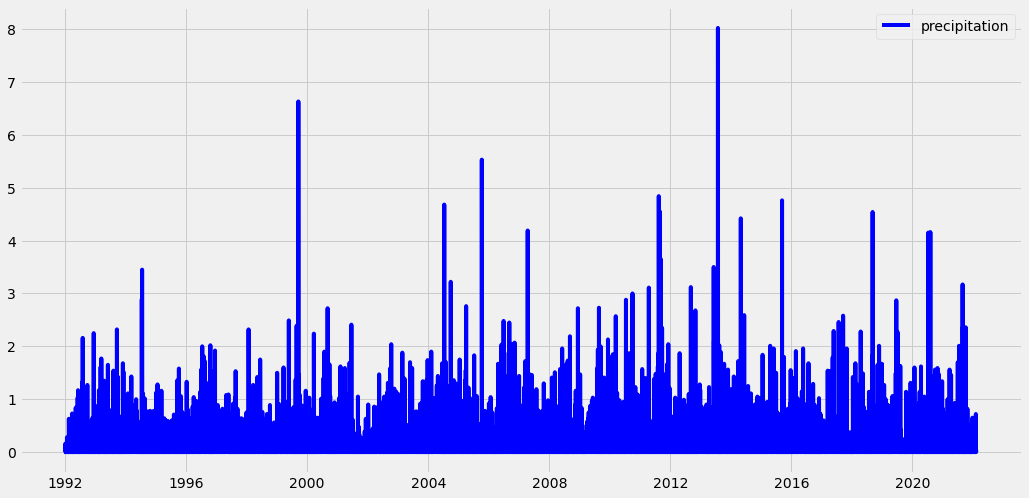

In [21]:
plt.figure(figsize=(16,8))
plt.plot(core_weather.index, core_weather['precip'], color='blue', label='precipitation')
plt.legend()
plt.show()

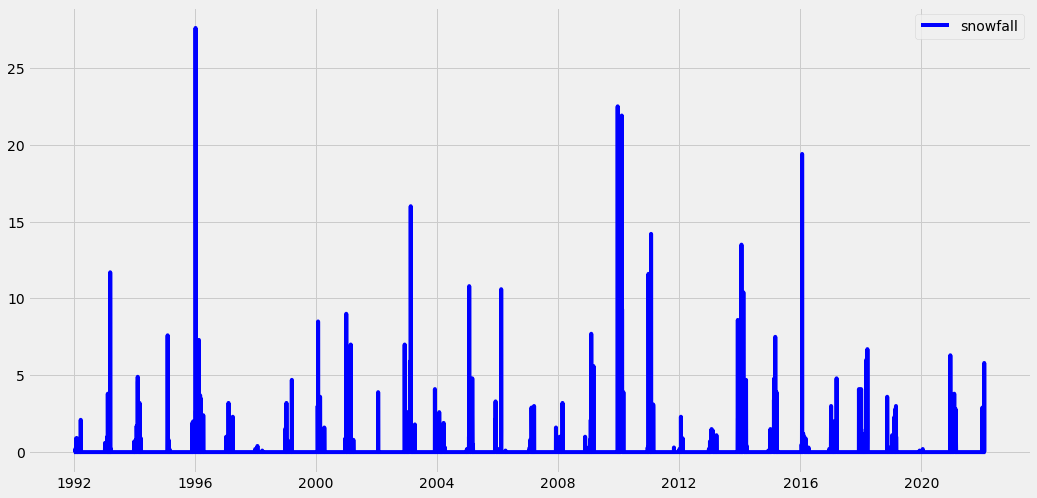

In [22]:
plt.figure(figsize=(16,8))
plt.plot(core_weather.index, core_weather['snow'], color='blue', label='snowfall')
plt.legend()
plt.show()

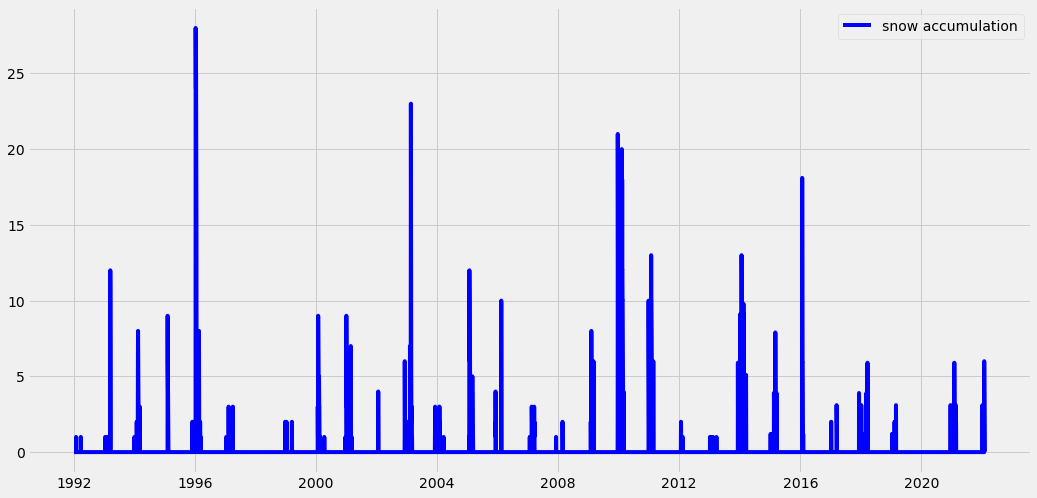

In [23]:
plt.figure(figsize=(16,8))
plt.plot(core_weather.index, core_weather['snow_depth'], color='blue', label='snow accumulation')
plt.legend()
plt.show()

In [24]:
grouped_year = core_weather.groupby(core_weather.index.year).sum()[['precip', 'snow', 'snow_depth']]

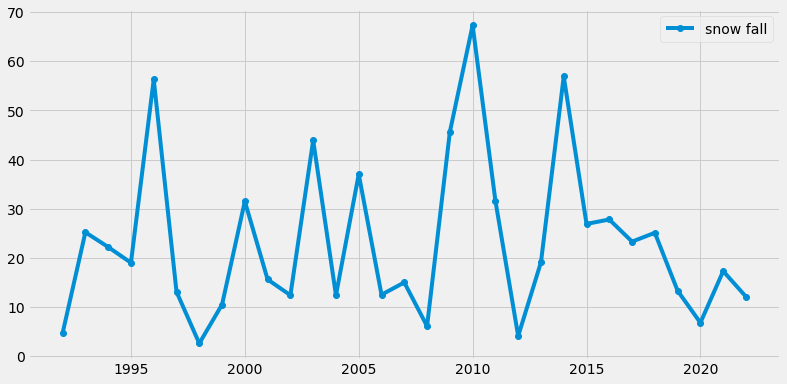

In [25]:
plt.figure(figsize=(12,6))
plt.plot(grouped_year.index, grouped_year['snow'], label='snow fall', marker='o')
plt.legend()
plt.show()

# Machine Learning to Predict Tomorrow Max Temperature

In [26]:
core_weather['target'] = core_weather.shift(-1)['temp_max']

In [27]:
core_weather

,precip,snow,snow_depth,temp_min,temp_max,target
DATE,,,,,,
1992-01-01,0.00,0.0,0.0,22.0,41.0,54.0
1992-01-02,0.00,0.0,0.0,36.0,54.0,56.0
1992-01-03,0.00,0.0,0.0,44.0,56.0,49.0
1992-01-04,0.16,0.0,0.0,44.0,49.0,50.0
1992-01-05,0.00,0.0,0.0,39.0,50.0,48.0
...,...,...,...,...,...,...
2022-02-05,0.00,0.0,0.0,22.0,32.0,39.0
2022-02-06,0.00,0.0,0.0,18.0,39.0,40.0
2022-02-07,0.04,0.0,0.0,33.0,40.0,44.0


In [28]:
core_weather = core_weather.iloc[:-1,:].copy()

In [29]:
core_weather

,precip,snow,snow_depth,temp_min,temp_max,target
DATE,,,,,,
1992-01-01,0.00,0.0,0.0,22.0,41.0,54.0
1992-01-02,0.00,0.0,0.0,36.0,54.0,56.0
1992-01-03,0.00,0.0,0.0,44.0,56.0,49.0
1992-01-04,0.16,0.0,0.0,44.0,49.0,50.0
1992-01-05,0.00,0.0,0.0,39.0,50.0,48.0
...,...,...,...,...,...,...
2022-02-04,0.72,0.0,0.0,31.0,58.0,32.0
2022-02-05,0.00,0.0,0.0,22.0,32.0,39.0
2022-02-06,0.00,0.0,0.0,18.0,39.0,40.0


In [30]:
from sklearn.linear_model import Ridge

reg = Ridge(alpha=.1)

In [51]:
predictors = ['precip','snow', 'snow_depth', 'temp_min', 'temp_max']

In [52]:
train = core_weather.loc[:'2020-12-31']

In [53]:
test = core_weather.loc['2021-01-01':]

In [54]:
reg.fit(train[predictors], train['target'])

Ridge(alpha=0.1)

In [61]:
predictions = reg.predict(test[predictors])

In [62]:
from sklearn.metrics import mean_absolute_error

In [63]:
mean_absolute_error(test['target'], predictions)

5.676012009219228

In [65]:
combined = pd.concat([test['target'], pd.Series(predictions, index=test.index)], axis=1)
combined.columns = ['actual', 'predictions']

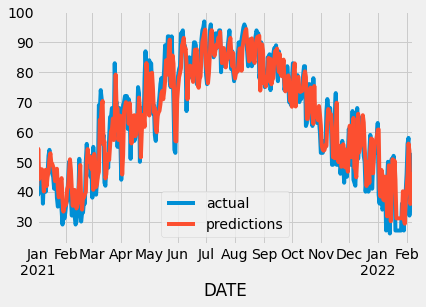

In [66]:
combined.plot()

In [67]:
reg.coef_

array([-2.08586054, -0.21114423,  0.04496136,  0.33616627,  0.62540868])

In [68]:
def create_predictions(predictors, core_weather, reg):
    train = core_weather.loc[:'2020-12-31']
    test = core_weather.loc['2021-01-01':]
    reg.fit(train[predictors], train['target'])
    predictions = reg.predict(test[predictors])
    error = mean_absolute_error(test['target'], predictions)
    combined = pd.concat([test['target'], pd.Series(predictions, index=test.index)], axis=1)
    combined.columns = ['actual', 'predictions']
    
    return error, combined

# Create More Predictors

In [69]:
core_weather["month_max"] = core_weather["temp_max"].rolling(30).mean()

In [70]:
core_weather

,precip,snow,snow_depth,temp_min,temp_max,target,month_max
DATE,,,,,,,
1992-01-01,0.00,0.0,0.0,22.0,41.0,54.0,NaN
1992-01-02,0.00,0.0,0.0,36.0,54.0,56.0,NaN
1992-01-03,0.00,0.0,0.0,44.0,56.0,49.0,NaN
1992-01-04,0.16,0.0,0.0,44.0,49.0,50.0,NaN
1992-01-05,0.00,0.0,0.0,39.0,50.0,48.0,NaN
...,...,...,...,...,...,...,...
2022-02-04,0.72,0.0,0.0,31.0,58.0,32.0,38.166667
2022-02-05,0.00,0.0,0.0,22.0,32.0,39.0,37.866667
2022-02-06,0.00,0.0,0.0,18.0,39.0,40.0,38.033333


In [71]:
core_weather['month_day_max'] = core_weather['month_max'] / core_weather['temp_max']

In [72]:
core_weather

,precip,snow,snow_depth,temp_min,temp_max,target,month_max,month_day_max
DATE,,,,,,,,
1992-01-01,0.00,0.0,0.0,22.0,41.0,54.0,NaN,NaN
1992-01-02,0.00,0.0,0.0,36.0,54.0,56.0,NaN,NaN
1992-01-03,0.00,0.0,0.0,44.0,56.0,49.0,NaN,NaN
1992-01-04,0.16,0.0,0.0,44.0,49.0,50.0,NaN,NaN
1992-01-05,0.00,0.0,0.0,39.0,50.0,48.0,NaN,NaN
...,...,...,...,...,...,...,...,...
2022-02-04,0.72,0.0,0.0,31.0,58.0,32.0,38.166667,0.658046
2022-02-05,0.00,0.0,0.0,22.0,32.0,39.0,37.866667,1.183333
2022-02-06,0.00,0.0,0.0,18.0,39.0,40.0,38.033333,0.975214


In [73]:
core_weather['max_min'] = core_weather['temp_max'] / core_weather['temp_min']

In [74]:
predictors = ['precip','snow', 'snow_depth', 'temp_min', 'temp_max', 
             'month_max', 'month_day_max', 'max_min']

In [75]:
# Remove the first 30 rows of weather
core_weather = core_weather.iloc[30:,:]

In [76]:
error, combined = create_predictions(predictors, core_weather, reg)

In [77]:
error

5.496991796523226

In [78]:
combined

,actual,predictions
DATE,,
2021-01-01,53.0,41.747561
2021-01-02,39.0,52.012834
2021-01-03,43.0,42.642509
2021-01-04,42.0,45.398724
2021-01-05,43.0,45.261772
...,...,...
2022-02-04,32.0,50.976420
2022-02-05,39.0,35.000915
2022-02-06,40.0,38.857394


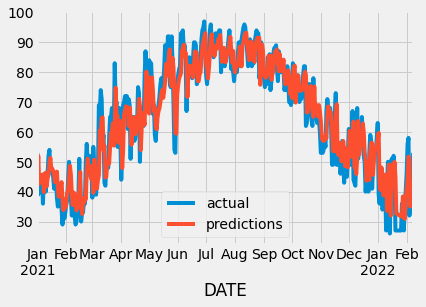

In [79]:
combined.plot()

In [80]:
core_weather['monthly_avg'] = core_weather['temp_max'].groupby(core_weather.index.month).apply(lambda x: x.expanding(1).mean())

<ipython-input-80-c5261b1d531a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  core_weather['monthly_avg'] = core_weather['temp_max'].groupby(core_weather.index.month).apply(lambda x: x.expanding(1).mean())


In [83]:
predictors = ['precip','snow', 'snow_depth', 'temp_min', 'temp_max', 
             'month_max', 'month_day_max', 'max_min', 'monthly_avg']

In [84]:
error, combined = create_predictions(predictors, core_weather, reg)

In [85]:
error

5.307422228665949

In [86]:
combined

,actual,predictions
DATE,,
2021-01-01,53.0,40.471224
2021-01-02,39.0,49.798736
2021-01-03,43.0,41.097068
2021-01-04,42.0,43.769123
2021-01-05,43.0,43.495586
...,...,...
2022-02-04,32.0,51.199345
2022-02-05,39.0,36.632202
2022-02-06,40.0,40.346694


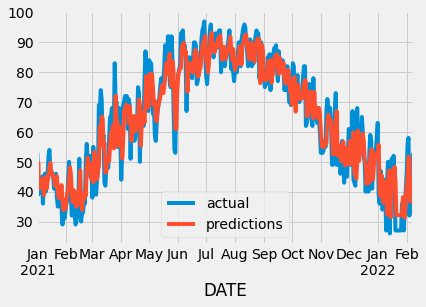

In [87]:
combined.plot()


In [88]:
reg.coef_

array([-1.76975458, -0.31181776, -0.00546077,  0.09236338,  0.5348121 ,
        0.07787691, -2.19303333, -0.17891881,  0.29561048])

In [89]:
core_weather.corr()['target']

precip          -0.015374
snow            -0.159752
snow_depth      -0.215544
temp_min         0.895160
temp_max         0.915549
target           1.000000
month_max        0.856507
month_day_max   -0.372227
max_min         -0.350338
monthly_avg      0.874082
Name: target, dtype: float64

It looks like precip, snow, and snow-depth don't really correlate with our target variable. Therefore, let's run the model again but without these predictors and see the performance

In [90]:
predictors = ['temp_min', 'temp_max', 'month_max', 'month_day_max', 'max_min', 'monthly_avg']

In [91]:
error, combined = create_predictions(predictors, core_weather, reg)

In [92]:
error

5.3602773573688784

In [96]:
combined['diff'] = (combined['actual'] - combined['predictions']).abs()
combined.sort_values('diff', ascending=False).head(20)

,actual,predictions,diff
DATE,,,
2021-03-25,83.0,58.889301,24.110699
2021-03-08,69.0,48.255123,20.744877
2022-02-04,32.0,52.403262,20.403262
2022-01-14,26.0,46.361577,20.361577
2021-04-21,50.0,69.172334,19.172334
2021-12-10,68.0,49.724765,18.275235
2021-11-18,49.0,67.055491,18.055491
2021-05-28,54.0,71.571281,17.571281
2022-01-20,27.0,44.192716,17.192716
